<a href="https://colab.research.google.com/github/127-0-0-vvk/WineQuality/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/winequality.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data = data.iloc[:,:]
print(data.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [5]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

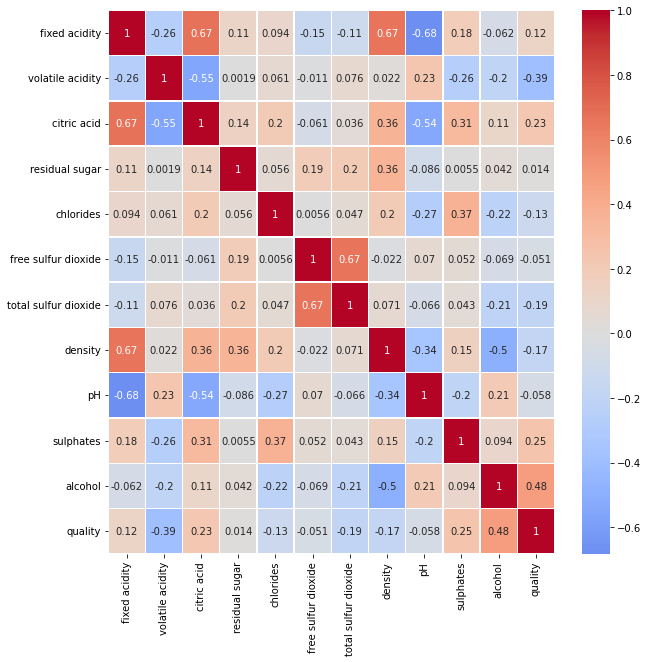

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

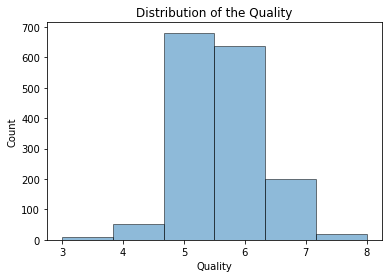

In [8]:
plt.hist(data.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


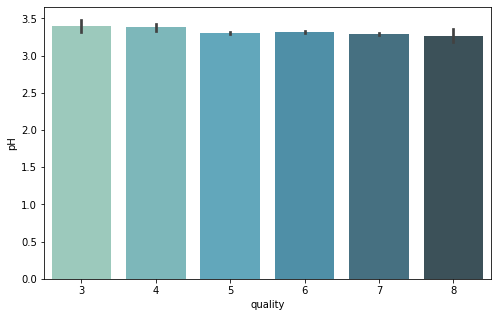

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data['quality'],data['pH'],palette="GnBu_d")
plt.show()

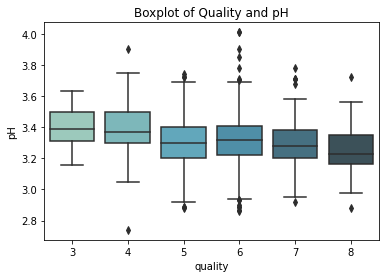

In [10]:
sns.boxplot(x='quality',y='pH',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and pH")
plt.show()

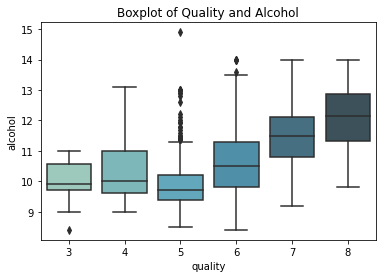

In [11]:
ax = sns.boxplot(x='quality',y='alcohol',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

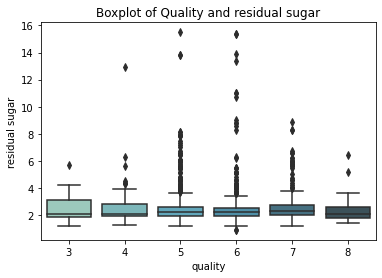

In [12]:
sns.boxplot(x="quality",y="residual sugar",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and residual sugar")
plt.show()

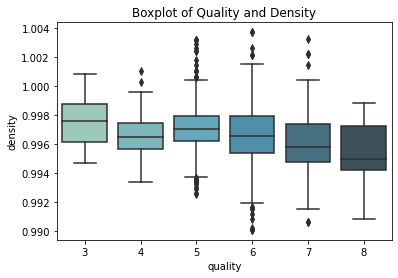

In [13]:
sns.boxplot(x="quality",y="density",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Density")
plt.show()

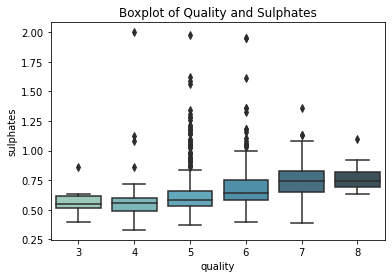

In [14]:
sns.boxplot(x="quality",y="sulphates",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

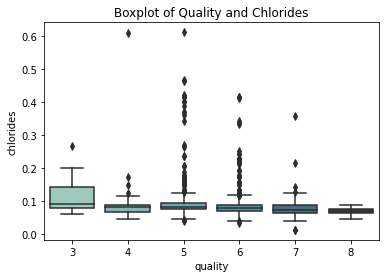

In [15]:
sns.boxplot(x="quality",y="chlorides",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Chlorides")
plt.show()

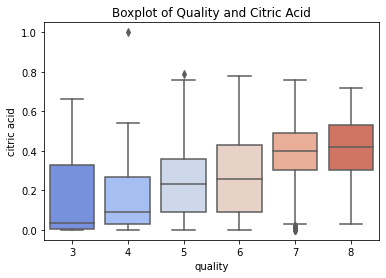

In [16]:
sns.boxplot(x="quality",y="citric acid",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Citric Acid")
plt.show()

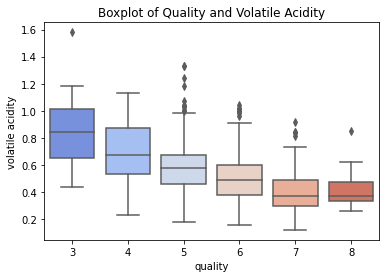

In [17]:
sns.boxplot(x="quality",y="volatile acidity",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

### ***Here im trying to Predict the Quality of wine based on the new input values***

In [18]:
data.loc[data['quality'] > 7 , 'quality'] = 1
data.loc[data['quality'] < 5 , 'quality'] = 0
data.loc[data['quality'] == 5 , 'quality'] = 1

data.quality.value_counts()

1    681
6    638
7    199
0     81
Name: quality, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

X = data.iloc[:,:11].values
Y = data.iloc[:,-1].values

#Splitting the dataset into training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Training using Logistic Regression
cl = LogisticRegression()
cl.fit(X_train,Y_train)

#Making confusion matrix
cm = confusion_matrix(Y_test,cl.predict(X_test))
print(cm)


[[  0  11   7   3]
 [  1 132  36   0]
 [  3  52  95  20]
 [  0   3  24  13]]


In [20]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [21]:
new_input = [[5.4, 0.28, 0.04, 0.9, 0.076, 7.0, 20.0, 0.0968, 1.26, 0.56, 1.4]]
new_output = cl.predict(new_input)
if new_output == 1:
  print('Good Qualtiy...baby')
else:
  print('What the fk, is this a wine... ?')

Good Qualtiy...baby


MOST of the Data is inconsistant due to confusion matrix and most of the them are good quality. so its really easy to get good quality.